In [1]:
import requests
import json
import prettytable
import os
import pandas as pd
import dtale
import plotly.express as px 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup

## BLS_key

In [2]:
bls_key = os.environ.get('bls_key')

# The url for BLS API v2
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

# API key in config.py which contains: bls_key = 'key'
key = '?registrationkey={}'.format(bls_key)

# Survey Legend:
* Series ID    CEU0800000003
* Positions       Value           Field Name
* 1-2             CE              Prefix
* 3               U               Seasonal Adjustment Code
* 4-11		08000000	Supersector and Industry Codes
* 12-13           03(Wages)              Data Type Code    OR     01(Employment) 

##  Industry: AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES 2015 - 2020

In [3]:
# Series stored as a dictionary #CEU-Industry code-03
series_dict = {'CEU4422000003': 'Utilities',
               'CEU5553100003': 'Real Estate',
               'CEU4142000003': 'Wholesale_Trade',
               'CEU6054000003': 'Professional & Technical Services',
               'CEU3000000003': 'Manufacturing',
               'CEU1021100003': 'Mining & Logging',
               'CEU6056000003': 'Waste Services',
               'CEU7071000003': 'Arts, Entertainment, And Recreation',
               'CEU7072000003': 'Accommodations & Food Services',
               'CEU5500000003': 'Finance & Insurance',
               'CEU6055000003': 'Management of Companies & Enterprises',
               'CEU2000000003': 'Construction',
               'CEU6562000003': 'Healthcare',
               'CEU4300000003': 'Transportation',
               'CEU4200000003': 'Retail',
               'CEU5000000003': 'Information',
               'CEU8000000003': 'Other_Services'} 

# Start year and end year
dates = ('2015', '2020')

In [4]:
# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']

In [5]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.tail()

,Utilities,Real Estate,Wholesale_Trade,Professional & Technical Services,Manufacturing,Mining & Logging,Waste Services,"Arts, Entertainment, And Recreation",Accommodations & Food Services,Finance & Insurance,Management of Companies & Enterprises,Construction,Healthcare,Transportation,Retail,Information,Other_Services
2020-08-01,44.06,29.01,32.64,44.14,28.89,48.43,22.82,22.80,15.89,38.34,43.06,31.93,28.86,25.60,21.21,44.30,26.48
2020-09-01,44.10,29.10,32.47,43.82,28.92,47.81,22.92,24.10,16.05,37.97,43.01,31.89,28.95,25.39,21.52,43.78,26.55
2020-10-01,44.23,29.23,32.60,44.07,28.77,47.92,22.86,24.09,16.14,38.42,42.72,31.92,29.00,25.42,21.14,44.57,26.45
2020-11-01,44.64,29.45,32.94,44.73,29.01,48.06,22.97,24.52,16.01,39.17,43.37,32.03,29.27,25.34,21.08,45.05,26.79
2020-12-01,44.23,29.65,32.82,44.40,29.07,47.72,23.13,25.19,16.16,38.96,43.62,32.25,29.82,25.58,20.95,44.04,26.87


In [6]:
df.to_csv('industry_data_earnings.csv')

In [7]:
df = pd.read_csv('industry_data_earnings.csv')
df.shape

(72, 18)

In [8]:
print(df.tail())

    Unnamed: 0  Utilities  Real Estate  Wholesale_Trade  \
67  2020-08-01      44.06        29.01            32.64   
68  2020-09-01      44.10        29.10            32.47   
69  2020-10-01      44.23        29.23            32.60   
70  2020-11-01      44.64        29.45            32.94   
71  2020-12-01      44.23        29.65            32.82   

    Professional & Technical Services  Manufacturing  Mining & Logging  \
67                              44.14          28.89             48.43   
68                              43.82          28.92             47.81   
69                              44.07          28.77             47.92   
70                              44.73          29.01             48.06   
71                              44.40          29.07             47.72   

    Waste Services  Arts, Entertainment, And Recreation  \
67           22.82                                22.80   
68           22.92                                24.10   
69           22.86     

<AxesSubplot:title={'center':'Industry: AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES 15-20'}>

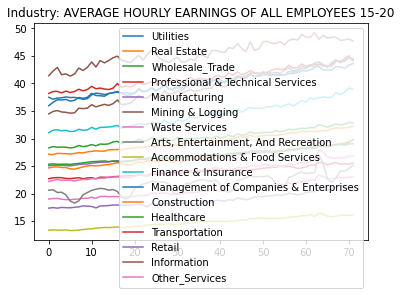

In [9]:
# Simple line plot of the data
df.plot(title='Industry: AVERAGE HOURLY EARNINGS OF ALL EMPLOYEES 15-20')

## Industry: All employees, thousands 2019 - 2021

In [10]:
# Series stored as a dictionary #CEU-Industry code-01 (Employment Survey)
series_dict = {'CEU4422000001': 'Utilities',
               'CEU5553100001': 'Real Estate',
               'CEU4142000001': 'Wholesale_Trade',
               'CEU6054000001': 'Professional & Technical Services',
               'CEU3000000001': 'Manufacturing',
               'CEU1021100001': 'Mining & Logging',
               'CEU6056000001': 'Waste Services',
               'CEU7071000001': 'Arts, Entertainment, And Recreation',
               'CEU7072000001': 'Accommodations & Food Services',
               'CEU5500000001': 'Finance & Insurance',
               'CEU6055000001': 'Management of Companies & Enterprises',
               'CEU2000000001': 'Construction',
               'CEU6562000001': 'Healthcare',
               'CEU4300000001': 'Transportation',
               'CEU4200000001': 'Retail',
               'CEU5000000001': 'Information',
               'CEU8000000001': 'Other_Services'} 

# Start year and end year
dates = ('2019', '2021')

In [11]:
# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']


In [12]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.tail()

,Utilities,Real Estate,Wholesale_Trade,Professional & Technical Services,Manufacturing,Mining & Logging,Waste Services,"Arts, Entertainment, And Recreation",Accommodations & Food Services,Finance & Insurance,Management of Companies & Enterprises,Construction,Healthcare,Transportation,Retail,Information,Other_Services
2021-07-01,542.3,1780.2,5744.9,9881.8,12460.0,139.5,8838.3,2390.8,13472.9,8897.0,2346.6,7640.0,20025.9,5703.0,15347.5,2761.0,5786.0
2021-08-01,537.6,1782.8,5735.7,9911.0,12492.0,140.9,8923.8,2384.8,13441.1,8901.0,2347.3,7644.0,20029.8,5746.8,15309.1,2784.0,5783.0
2021-09-01,534.5,1771.0,5724.8,9885.4,12465.0,141.7,8984.7,2212.3,13184.8,8860.0,2337.2,7626.0,20019.4,5870.1,15279.6,2771.0,5726.0
2021-10-01,535.9,1791.3,5747.2,10036.2,12517.0,143.3,9224.9,2164.2,13270.7,8907.0,2341.8,7666.0,20146.0,5977.9,15500.1,2790.0,5773.0
2021-11-01,536.4,1791.7,5764.3,10101.8,12558.0,141.6,9259.5,2095.9,13236.3,8915.0,2347.1,7605.0,20201.8,6210.8,15831.7,2797.0,5781.0


In [13]:
df.to_csv('industry_data_employees.csv')

In [14]:
df_2= pd.read_csv('industry_data_employees.csv')
df.shape

(35, 17)

In [15]:
print(df_2.head())

   Unnamed: 0  Utilities  Real Estate  Wholesale_Trade  \
0  2019-01-01      549.7       1670.3           5837.2   
1  2019-02-01      547.1       1675.6           5853.6   
2  2019-03-01      549.4       1682.8           5857.1   
3  2019-04-01      546.5       1696.0           5874.6   
4  2019-05-01      548.6       1707.2           5892.9   

   Professional & Technical Services  Manufacturing  Mining & Logging  \
0                             9384.9        12737.0             141.1   
1                             9470.4        12762.0             142.3   
2                             9479.6        12774.0             142.9   
3                             9520.2        12769.0             143.1   
4                             9439.0        12799.0             143.8   

   Waste Services  Arts, Entertainment, And Recreation  \
0          8929.3                               2163.1   
1          8971.9                               2192.7   
2          9026.0                     

<AxesSubplot:title={'center':'Industry: All employees, thousands'}>

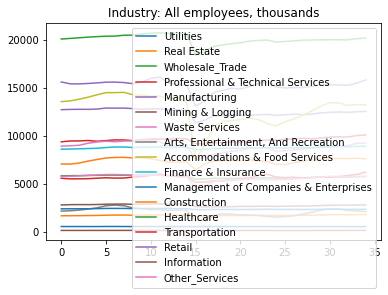

In [16]:
# Simple line plot of the data
df_2.plot(title='Industry: All employees, thousands')

In [17]:
closure_data = pd.read_csv('closures_data.csv')
closure_data.head()

,Industry,Percentage of establishments,Standard error of the percentage of establishments,Number of establishments,Standard error of the number of establishments,Percentage of employment In establishments,Standard error of the percentage of employment In establishments,Employment in establishments,Standard error of the employment in establishments
0,Total Private Employment Percentages,18.74,0.25,1584019,20908,20.51,0.36,25894712,451192
1,"Agriculture, Forestry, Fishing and Hunting",2.54,1.80,2658,1887,1.58,3.51,20196,44933
2,"Mining, Quarrying, and Oil and Gas Extraction",2.72,1.10,832,336,3.60,3.63,24298,24482
3,Utilities,4.77,1.71,877,315,3.80,1.38,20861,7567
4,Construction,11.87,0.36,92665,2820,11.40,0.68,855760,51038


In [18]:
bsn= closure_data.set_index('Industry').transpose()
bsn.head(10)

Industry,Total Private Employment Percentages,"Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing (excluding Scheduled Air Transportation and Truck Transportation),Scheduled Air Transportation,...,Real Estate and Rental and Leasing,Professional and Technical Services,Management of Companies and Enterprises,Administrative and Waste Services,Educational Services,Health Care,Social Assistance,"Arts, Entertainment, and Recreation",Accommodation and Food Services,"Other Services, Except Public Administration"
Percentage of establishments,18.74,2.54,2.72,4.77,11.87,13.58,8.23,25.20,13.73,4.59,...,14.44,11.85,15.00,12.15,40.19,26.54,25.73,47.86,36.16,28.31
Standard error of the percentage of establishments,0.25,1.80,1.10,1.71,0.36,0.35,0.74,0.52,2.99,2.09,...,1.31,0.57,1.80,1.00,2.72,0.52,5.68,2.53,0.53,1.02
Number of establishments,1584019.00,2658.00,832.00,877.00,92665.00,46710.00,47875.00,256338.00,15455.00,110.00,...,58113.00,141413.00,10044.00,64472.00,49081.00,185162.00,54551.00,70614.00,256531.00,167097.00
Standard error of the number of establishments,20908.00,1887.00,336.00,315.00,2820.00,1205.00,4285.00,5265.00,3362.00,50.00,...,5287.00,6763.00,1202.00,5324.00,3325.00,3618.00,12038.00,3725.00,3764.00,6033.00
Percentage of employment In establishments,20.51,1.58,3.60,3.80,11.40,10.07,8.01,23.79,10.76,0.75,...,16.72,20.32,19.21,14.73,41.42,16.32,24.62,65.73,40.34,33.42
Standard error of the percentage of employment In establishments,0.36,3.51,3.63,1.38,0.68,0.53,1.45,1.30,2.04,3.22,...,1.61,1.66,2.58,2.05,2.50,0.88,1.70,2.45,0.86,1.38
Employment in establishments,25894712.00,20196.00,24298.00,20861.00,855760.00,1293935.00,474586.00,3745319.00,380250.00,3433.00,...,387256.00,1953322.00,465934.00,1382370.00,1229863.00,2652964.00,833684.00,1604339.00,5724037.00,1435679.00
Standard error of the employment in establishments,451192.00,44933.00,24482.00,7567.00,51038.00,68498.00,85810.00,205173.00,72195.00,14827.00,...,37221.00,159803.00,62642.00,192671.00,74108.00,142976.00,57606.00,59916.00,122061.00,59080.00


In [19]:
closure_data.to_csv('business_closure_data.csv')

In [20]:
non_closure_data = pd.read_csv('non_closures.csv')
non_closure_data.head(10)

,Industries,Percentage of businesses,Standard error of the percentage of businesses,Number of businesses,Standard error of the number of businesses,Percentage of employment In businesses,Standard error of the percentage of employment In businesses,Employment in businesses,Standard error of the employment in businesses
0,Total Private Employment Percentages,17.75,0.26,"1,500,849","22,242",13.45,0.32,"16,981,279","398,430"
1,"Agriculture, Forestry, Fishing and Hunting",27.99,4.48,"29,284","4,688",20.39,4.10,"260,820","52,418"
2,"Mining, Quarrying, and Oil and Gas Extraction",21.63,2.95,"6,614",902,18.16,3.98,"122,624","26,857"
3,Utilities,57.21,3.32,"10,529",612,57.63,2.02,"316,275","11,074"
4,Construction,19.45,0.43,"151,908","3,368",21.24,1.03,"1,594,713","77,123"
5,Manufacturing,12.62,0.32,"43,400","1,114",9.66,0.69,"1,241,876","88,922"
6,Wholesale Trade,17.06,0.83,"99,292","4,840",11.63,1.64,"688,623","97,119"
7,Retail Trade,7.74,0.32,"78,757","3,251",5.75,1.07,"904,945","168,849"
8,Transportation and Warehousing (excluding Sche...,16.07,2.07,"18,094","2,331",10.78,2.16,"380,982","76,422"
9,Scheduled Air Transportation,10.61,2.25,254,54,1.72,3.23,"7,912","14,839"


In [21]:
non= non_closure_data.set_index('Industries').transpose()
non.head(10)

Industries,Total Private Employment Percentages,"Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing (excluding Scheduled Air Transportation and Truck Transportation),Scheduled Air Transportation,...,Real Estate and Rental and Leasing,Professional and Technical Services,Management of Companies and Enterprises,Administrative and Waste Services,Educational Services,Health Care,Social Assistance,"Arts, Entertainment, and Recreation",Accommodation and Food Services,"Other Services, Except Public Administration"
Percentage of businesses,17.75,27.99,21.63,57.21,19.45,12.62,17.06,7.74,16.07,10.61,...,29.4,28.27,39.15,21.0,12.57,7.9,18.13,7.25,5.31,12.42
Standard error of the percentage of businesses,0.26,4.48,2.95,3.32,0.43,0.32,0.83,0.32,2.07,2.25,...,1.54,0.79,2.44,1.09,2.11,0.32,5.7,1.66,0.25,0.72
Number of businesses,"1,500,849","29,284","6,614","10,529","151,908","43,400","99,292","78,757","18,094",254,...,"118,324","337,189","26,209","111,446","15,351","55,111","38,440","10,703","37,701","73,288"
Standard error of the number of businesses,"22,242","4,688",902,612,"3,368","1,114","4,840","3,251","2,331",54,...,"6,179","9,372","1,632","5,782","2,576","2,264","12,092","2,447","1,770","4,258"
Percentage of employment In businesses,13.45,20.39,18.16,57.63,21.24,9.66,11.63,5.75,10.78,1.72,...,24.82,25.41,30.83,17.5,14.17,5.77,10.65,2.75,4.41,9.38
Standard error of the percentage of employment In businesses,0.32,4.1,3.98,2.02,1.03,0.69,1.64,1.07,2.16,3.23,...,1.77,1.72,2.62,1.53,2.22,0.58,1.35,1.44,0.44,0.86
Employment in businesses,"16,981,279","260,820","122,624","316,275","1,594,713","1,241,876","688,623","904,945","380,982","7,912",...,"574,933","2,443,098","747,970","1,642,177","420,867","938,780","360,779","67,037","625,533","403,166"
Standard error of the employment in businesses,"398,430","52,418","26,857","11,074","77,123","88,922","97,119","168,849","76,422","14,839",...,"41,093","164,889","63,587","143,238","65,805","94,716","45,659","35,190","63,046","37,076"


In [22]:
non.to_csv('nonclosure_data.csv')

In [23]:
inc_demand = pd.read_csv('inc_demand.csv')
inc_demand.head(10)

,Industries,Percentage of businesses,Standard error of the percentage of businesses,Number of businesses,Standard error of the number of businesses,Percentage of employment In businesses,Standard error of the percentage of employment In businesses,Employment in businesses,Standard error of the employment in businesses
0,"Total U.S., private sector 10",13.19,0.23,"1,115,161","19,071",18.90,0.38,"23,867,885","476,617"
1,"Agriculture, Forestry, Fishing and Hunting",9.02,1.86,"9,433","1,950",13.52,3.71,"172,891","47,430"
2,"Mining, Quarrying, and Oil and Gas Extraction",2.01,1.10,613,335,1.93,3.59,"13,045","24,260"
3,Utilities,4.96,1.75,912,321,3.82,1.40,"20,941","7,689"
4,Construction,10.45,0.32,"81,630","2,500",9.71,0.74,"729,160","55,899"
5,Manufacturing,12.42,0.30,"42,710","1,024",22.16,0.87,"2,847,631","112,300"
6,Wholesale Trade,15.44,0.80,"89,859","4,652",24.02,1.76,"1,422,530","104,151"
7,Retail Trade,27.09,0.51,"275,569","5,179",36.58,1.56,"5,758,441","245,579"
8,Transportation and Warehousing (excluding Sche...,11.59,1.80,"13,043","2,023",26.62,3.16,"940,283","111,732"
9,Scheduled Air Transportation,4.25,2.12,102,51,0.81,3.22,"3,711","14,822"


In [24]:
inc= inc_demand.set_index('Industries').transpose()
inc.head(10)

Industries,"Total U.S., private sector 10","Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing (excluding Scheduled Air Transportation and Truck Transportation),Scheduled Air Transportation,...,Real Estate and Rental and Leasing,Professional and Technical Services,Management of Companies and Enterprises,Administrative and Waste Services,Educational Services,Health Care,Social Assistance,"Arts, Entertainment, and Recreation",Accommodation and Food Services,"Other Services, Except Public Administration"
Percentage of businesses,13.19,9.02,2.01,4.96,10.45,12.42,15.44,27.09,11.59,4.25,...,10.36,8.67,12.6,13.32,7.26,12.76,22.6,8.93,9.93,10.36
Standard error of the percentage of businesses,0.23,1.86,1.1,1.75,0.32,0.3,0.8,0.51,1.8,2.12,...,1.03,0.46,1.93,0.97,1.71,0.39,5.68,1.78,0.31,0.71
Number of businesses,"1,115,161","9,433",613,912,"81,630","42,710","89,859","275,569","13,043",102,...,"41,674","103,401","8,434","70,707","8,868","88,991","47,917","13,175","70,470","61,159"
Standard error of the number of businesses,"19,071","1,950",335,321,"2,500","1,024","4,652","5,179","2,023",51,...,"4,165","5,464","1,292","5,123","2,087","2,695","12,039","2,629","2,202","4,184"
Percentage of employment In businesses,18.9,13.52,1.93,3.82,9.71,22.16,24.02,36.58,26.62,0.81,...,11.22,10.97,16.79,19.2,7.21,20.85,23.8,8.08,10.7,11.66
Standard error of the percentage of employment In businesses,0.38,3.71,3.59,1.4,0.74,0.87,1.76,1.56,3.16,3.22,...,1.66,1.59,2.48,1.93,1.83,1.0,1.72,2.02,0.54,1.1
Employment in businesses,"23,867,885","172,891","13,045","20,941","729,160","2,847,631","1,422,530","5,758,441","940,283","3,711",...,"259,887","1,054,806","407,274","1,801,580","213,973","3,389,604","805,973","197,311","1,517,843","500,864"
Standard error of the employment in businesses,"476,617","47,430","24,260","7,689","55,899","112,300","104,151","245,579","111,732","14,822",...,"38,524","152,863","60,046","181,576","54,482","162,579","58,144","49,235","77,327","47,113"


In [25]:
inc.to_csv('inc_demand_data.csv')

In [26]:
dec_demand = pd.read_csv('dec_demand.csv')
dec_demand.head(10)

,Industries,Percentage of businesses,Standard error of the percentage of businesses,Number of businesses,Standard error of the number of businesses,Percentage of employment In businesses,Standard error of the percentage of employment In businesses,Employment in businesses,Standard error of the employment in businesses
0,"Total U.S., private sector 10",55.58,0.28,"4,698,654","23,514",56.91,0.42,"71,860,832","525,649"
1,"Agriculture, Forestry, Fishing and Hunting",48.14,4.62,"50,371","4,836",51.52,4.75,"659,012","60,796"
2,"Mining, Quarrying, and Oil and Gas Extraction",70.03,3.12,"21,410",955,73.16,4.02,"494,075","27,130"
3,Utilities,17.56,3.35,"3,232",616,20.21,1.86,"110,931","10,223"
4,Construction,50.89,0.57,"397,358","4,428",51.00,0.96,"3,828,294","72,143"
5,Manufacturing,66.46,0.46,"228,520","1,581",63.78,0.93,"8,196,742","119,723"
6,Wholesale Trade,60.74,1.07,"353,454","6,208",59.18,2.10,"3,505,153","124,119"
7,Retail Trade,52.49,0.59,"533,895","6,004",47.31,1.62,"7,447,176","255,370"
8,Transportation and Warehousing (excluding Sche...,61.34,3.61,"69,057","4,063",57.77,3.19,"2,041,010","112,872"
9,Scheduled Air Transportation,75.55,2.44,"1,808",58,96.05,3.23,"441,868","14,877"


In [27]:
dec= dec_demand.set_index('Industries').transpose()
dec.head(10)

Industries,"Total U.S., private sector 10","Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing (excluding Scheduled Air Transportation and Truck Transportation),Scheduled Air Transportation,...,Real Estate and Rental and Leasing,Professional and Technical Services,Management of Companies and Enterprises,Administrative and Waste Services,Educational Services,Health Care,Social Assistance,"Arts, Entertainment, and Recreation",Accommodation and Food Services,"Other Services, Except Public Administration"
Percentage of businesses,55.58,48.14,70.03,17.56,50.89,66.46,60.74,52.49,61.34,75.55,...,40.55,52.58,36.27,56.35,62.3,64.18,38.72,59.93,71.21,58.25
Standard error of the percentage of businesses,0.28,4.62,3.12,3.35,0.57,0.46,1.07,0.59,3.61,2.44,...,1.75,0.87,2.17,1.45,2.62,0.56,1.74,2.69,0.5,1.17
Number of businesses,"4,698,654","50,371","21,410","3,232","397,358","228,520","353,454","533,895","69,057","1,808",...,"163,203","627,238","24,283","299,058","76,083","447,652","82,093","88,415","505,162","343,849"
Standard error of the number of businesses,"23,514","4,836",955,616,"4,428","1,581","6,208","6,004","4,063",58,...,"7,060","10,405","1,454","7,675","3,204","3,897","3,679","3,967","3,548","6,921"
Percentage of employment In businesses,56.91,51.52,73.16,20.21,51.0,63.78,59.18,47.31,57.77,96.05,...,43.61,50.17,41.99,59.6,44.79,66.41,49.61,59.13,74.39,61.95
Standard error of the percentage of employment In businesses,0.42,4.75,4.02,1.86,0.96,0.93,2.1,1.62,3.19,3.23,...,2.21,1.85,2.63,2.15,2.37,1.01,1.93,2.26,0.72,1.4
Employment in businesses,"71,860,832","659,012","494,075","110,931","3,828,294","8,196,742","3,505,153","7,447,176","2,041,010","441,868",...,"1,010,070","4,822,797","1,018,623","5,592,904","1,329,901","10,797,610","1,680,118","1,443,280","10,555,690","2,661,326"
Standard error of the employment in businesses,"525,649","60,796","27,130","10,223","72,143","119,723","124,119","255,370","112,872","14,877",...,"51,197","178,122","63,857","201,432","70,391","164,356","65,311","55,175","101,538","59,990"


In [28]:
dec.to_csv('dec_demand_data.csv')

In [29]:
got_payed = pd.read_csv('got_payed.csv')
got_payed.head(10)

,Industry,Percentage of establishments,Standard error of the percentage of establishments,Number of establishments,Standard error of the number of establishments,Percentage of employment In establishments,Standard error of the percentage of employment In establishments,Employment in establishments,Standard error of the employment in establishments
0,"Total U.S., private sector",51.25,0.43,"2,184,303","23,343",56.22,0.41,"43,538,873","501,133"
1,"Agriculture, Forestry, Fishing and Hunting",54.18,2.34,"16,080","2,149",65.61,3.76,"329,829","58,805"
2,"Mining, Quarrying, and Oil and Gas Extraction",49.66,5.43,"7,439","1,097",50.20,3.61,"195,605","38,193"
3,Utilities,83.95,1.86,"5,559",614,90.35,1.72,"215,045","10,196"
4,Construction,54.72,0.78,"214,696","4,038",63.17,1.04,"2,688,595","87,661"
5,Manufacturing,51.82,0.66,"99,143","1,548",55.99,1.13,"4,879,276","129,025"
6,Wholesale Trade,54.81,1.63,"143,116","5,628",55.03,1.93,"1,705,740","115,319"
7,Retail Trade,50.03,0.76,"289,379","5,456",59.60,1.59,"5,893,258","253,323"
8,Transportation and Warehousing (excluding Sche...,52.68,3.65,"34,059","3,816",56.34,2.25,"1,202,427","83,366"
9,Scheduled Air Transportation,52.41,3.45,721,70,68.22,3.24,"276,312","14,905"


In [30]:
payed= got_payed.set_index('Industry').transpose()
payed.head(10)

Industry,"Total U.S., private sector","Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing (excluding Scheduled Air Transportation and Truck Transportation),Scheduled Air Transportation,...,Real Estate and Rental and Leasing,Professional and Technical Services,Management of Companies and Enterprises,Administrative and Waste Services,Educational Services,Health Care,Social Assistance,"Arts, Entertainment, and Recreation",Accommodation and Food Services,"Other Services, Except Public Administration"
Percentage of establishments,51.25,54.18,49.66,83.95,54.72,51.82,54.81,50.03,52.68,52.41,...,61.13,53.08,58.76,46.53,49.19,51.86,60.19,42.47,31.75,40.47
Standard error of the percentage of establishments,0.43,2.34,5.43,1.86,0.78,0.66,1.63,0.76,3.65,3.45,...,2.32,1.37,3.06,1.91,2.62,0.75,8.46,3.12,0.62,1.53
Number of establishments,"2,184,303","16,080","7,439","5,559","214,696","99,143","143,116","289,379","34,059",721,...,"113,682","243,284","17,432","124,118","35,445","228,150","78,845","43,904","156,379","135,034"
Standard error of the number of establishments,"23,343","2,149","1,097",614,"4,038","1,548","5,628","5,456","3,816",70,...,"6,209","8,229","1,416","6,473","2,656","3,822","12,215","3,658","3,272","5,902"
Percentage of employment In establishments,56.22,65.61,50.2,90.35,63.17,55.99,55.03,59.6,56.34,68.22,...,61.68,54.99,61.39,51.24,73.71,58.09,63.37,51.58,34.55,48.85
Standard error of the percentage of employment In establishments,0.41,3.76,3.61,1.72,1.04,1.13,1.93,1.59,2.25,3.24,...,2.17,1.73,2.29,1.96,2.04,1.25,2.05,2.95,0.91,1.64
Employment in establishments,"43,538,873","329,829","195,605","215,045","2,688,595","4,879,276","1,705,740","5,893,258","1,202,427","276,312",...,"748,960","2,610,774","877,206","2,992,812","1,679,212","6,522,796","1,401,429","1,079,265","3,727,303","1,329,030"
Standard error of the employment in establishments,"501,133","58,805","38,193","10,196","87,661","129,025","115,319","253,323","83,366","14,905",...,"48,026","151,865","63,451","162,512","67,204","175,951","60,104","65,552","110,848","70,218"


In [31]:
payed.to_csv('jobs_payed.csv')

In [32]:
may_get_payed = pd.read_csv('may_get_payed.csv')
may_get_payed.head()

,Industry,Percentage of establishments,Standard error of the percentage of establishments,Number of establishments,Standard error of the number of establishments,Percentage of employment In establishments,Standard error of the percentage of employment In establishments,Employment in establishments,Standard error of the employment in establishments
0,"Total U.S., private sector",51.85,0.30,"4,383,425","25,764",62.00,0.39,"78,287,877","492,014"
1,"Agriculture, Forestry, Fishing and Hunting",26.60,2.29,"27,835","2,400",35.72,4.68,"456,971","59,927"
2,"Mining, Quarrying, and Oil and Gas Extraction",48.34,4.60,"14,779","1,406",59.69,5.16,"403,100","34,835"
3,Utilities,36.54,3.41,"6,724",628,42.75,1.89,"234,657","10,357"
4,Construction,51.50,0.56,"402,153","4,409",57.64,1.16,"4,326,802","86,831"


In [33]:
might_pay= may_get_payed.set_index('Industry').transpose()
might_pay.head(10)

Industry,"Total U.S., private sector","Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing (excluding Scheduled Air Transportation and Truck Transportation),Scheduled Air Transportation,...,Real Estate and Rental and Leasing,Professional and Technical Services,Management of Companies and Enterprises,Administrative and Waste Services,Educational Services,Health Care,Social Assistance,"Arts, Entertainment, and Recreation",Accommodation and Food Services,"Other Services, Except Public Administration"
Percentage of establishments,51.85,26.6,48.34,36.54,51.5,56.0,45.11,57.29,56.11,55.87,...,46.59,38.33,45.02,50.08,57.88,63.56,63.07,70.29,69.79,56.51
Standard error of the percentage of establishments,0.3,2.29,4.6,3.41,0.56,0.49,1.19,0.58,2.56,2.97,...,1.68,0.86,2.22,1.37,2.65,0.57,5.75,2.55,0.51,1.22
Number of establishments,"4,383,425","27,835","14,779","6,724","402,153","192,564","262,535","582,704","63,165","1,337",...,"187,502","457,184","30,140","265,800","70,686","443,334","133,729","103,704","495,088","333,563"
Standard error of the number of establishments,"25,764","2,400","1,406",628,"4,409","1,672","6,941","5,922","2,881",71,...,"6,748","10,264","1,486","7,282","3,233","4,004","12,193","3,762","3,653","7,174"
Percentage of employment In establishments,62.0,35.72,59.69,42.75,57.64,67.48,52.92,62.32,59.14,83.75,...,53.56,49.11,59.72,60.98,73.85,68.46,65.9,85.13,75.32,63.76
Standard error of the percentage of employment In establishments,0.39,4.68,5.16,1.89,1.16,0.81,2.22,1.49,3.23,3.24,...,2.04,1.66,2.65,1.74,2.1,1.01,1.91,1.99,0.73,1.57
Employment in establishments,"78,287,877","456,971","403,100","234,657","4,326,802","8,672,302","3,134,301","9,811,026","2,089,293","385,287",...,"1,240,545","4,721,035","1,448,716","5,722,454","2,192,867","11,132,058","2,231,652","2,077,966","10,686,937","2,738,889"
Standard error of the employment in establishments,"492,014","59,927","34,835","10,357","86,831","103,790","131,464","235,235","114,219","14,888",...,"47,280","159,420","64,262","163,357","62,370","163,829","64,707","48,569","103,559","67,577"


In [34]:
might_pay.to_csv('uncertain_pay.csv')

In [35]:
inc_wages = pd.read_csv('increased_wages.csv')
inc_wages.head()

,Industry,Percentage of establishments,Standard error of the percentage of establishments,Number of establishments,Standard error of the number of establishments,Percentage of employment In establishments,Standard error of the percentage of employment In establishments,Employment in establishments,Standard error of the employment in establishments
0,"Total U.S., private sector 10",5.60,0.12,"473,460","9,916",9.74,0.29,"12,295,992","370,376"
1,"Agriculture, Forestry, Fishing and Hunting",11.21,4.19,"11,728","4,382",10.07,3.99,"128,861","51,096"
2,"Mining, Quarrying, and Oil and Gas Extraction",1.07,0.86,327,263,0.70,1.84,"4,729","12,433"
3,Utilities,1.25,1.56,231,286,1.12,1.23,"6,173","6,750"
4,Construction,4.08,0.21,"31,853","1,615",4.82,0.57,"362,130","42,767"


In [36]:
inc_pay= inc_wages.set_index('Industry').transpose()
inc_pay.head(10)

Industry,"Total U.S., private sector 10","Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing (excluding Scheduled Air Transportation and Truck Transportation),Scheduled Air Transportation,...,Real Estate and Rental and Leasing,Professional and Technical Services,Management of Companies and Enterprises,Administrative and Waste Services,Educational Services,Health Care,Social Assistance,"Arts, Entertainment, and Recreation",Accommodation and Food Services,"Other Services, Except Public Administration"
Percentage of establishments,5.6,11.21,1.07,1.25,4.08,5.41,3.83,11.28,9.04,0.35,...,2.62,2.27,5.95,5.27,2.35,9.2,6.86,1.95,9.84,2.52
Standard error of the percentage of establishments,0.12,4.19,0.86,1.56,0.21,0.2,0.4,0.35,1.53,1.99,...,0.55,0.24,1.22,0.51,1.25,0.31,0.9,0.64,0.31,0.31
Number of establishments,"473,460","11,728",327,231,"31,853","18,605","22,315","114,707","10,179",8,...,"10,546","27,095","3,981","27,990","2,866","64,159","14,539","2,881","69,820","14,857"
Standard error of the number of establishments,"9,916","4,382",263,286,"1,615",703,"2,332","3,587","1,718",48,...,"2,202","2,908",817,"2,712","1,532","2,165","1,918",939,"2,209","1,815"
Percentage of employment In establishments,9.74,10.07,0.7,1.12,4.82,9.23,7.9,16.54,13.47,0.05,...,3.54,3.96,7.48,7.44,3.1,18.07,13.07,1.55,11.06,3.92
Standard error of the percentage of employment In establishments,0.29,3.99,1.84,1.23,0.57,0.66,1.23,1.16,2.21,3.22,...,1.17,1.2,2.16,1.44,1.5,0.94,1.27,1.39,0.54,0.83
Employment in establishments,"12,295,992","128,861","4,729","6,173","362,130","1,186,643","467,740","2,603,802","475,979",219,...,"82,085","381,121","181,358","698,274","92,092","2,937,458","442,671","37,839","1,569,617","168,516"
Standard error of the employment in establishments,"370,376","51,096","12,433","6,750","42,767","84,539","72,997","182,960","78,126","14,818",...,"27,154","115,322","52,405","135,582","44,629","153,551","43,022","33,884","77,149","35,520"


In [37]:
inc_pay.to_csv('inc_pay.csv')

In [38]:
dec_wages = pd.read_csv('decreased_wages.csv')
dec_wages.head()

,Industry,Percentage of establishments,Standard error of the percentage of establishments,Number of establishments,Standard error of the number of establishments,Percentage of employment In establishments,Standard error of the percentage of employment In establishments,Employment in establishments,Standard error of the employment in establishments
0,"Total U.S., private sector 10",10.58,0.19,"894,158","15,667",14.72,0.33,"18,591,190","422,908"
1,"Agriculture, Forestry, Fishing and Hunting",3.12,1.80,"3,261","1,888",4.29,3.91,"54,843","50,024"
2,"Mining, Quarrying, and Oil and Gas Extraction",22.79,4.74,"6,967","1,449",35.09,5.88,"236,949","39,682"
3,Utilities,0.63,1.49,115,275,1.04,1.25,"5,726","6,867"
4,Construction,6.62,0.31,"51,710","2,394",7.66,0.82,"575,360","61,809"


In [39]:
dec_pay= inc_wages.set_index('Industry').transpose()
dec_pay.head(10)

Industry,"Total U.S., private sector 10","Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing (excluding Scheduled Air Transportation and Truck Transportation),Scheduled Air Transportation,...,Real Estate and Rental and Leasing,Professional and Technical Services,Management of Companies and Enterprises,Administrative and Waste Services,Educational Services,Health Care,Social Assistance,"Arts, Entertainment, and Recreation",Accommodation and Food Services,"Other Services, Except Public Administration"
Percentage of establishments,5.6,11.21,1.07,1.25,4.08,5.41,3.83,11.28,9.04,0.35,...,2.62,2.27,5.95,5.27,2.35,9.2,6.86,1.95,9.84,2.52
Standard error of the percentage of establishments,0.12,4.19,0.86,1.56,0.21,0.2,0.4,0.35,1.53,1.99,...,0.55,0.24,1.22,0.51,1.25,0.31,0.9,0.64,0.31,0.31
Number of establishments,"473,460","11,728",327,231,"31,853","18,605","22,315","114,707","10,179",8,...,"10,546","27,095","3,981","27,990","2,866","64,159","14,539","2,881","69,820","14,857"
Standard error of the number of establishments,"9,916","4,382",263,286,"1,615",703,"2,332","3,587","1,718",48,...,"2,202","2,908",817,"2,712","1,532","2,165","1,918",939,"2,209","1,815"
Percentage of employment In establishments,9.74,10.07,0.7,1.12,4.82,9.23,7.9,16.54,13.47,0.05,...,3.54,3.96,7.48,7.44,3.1,18.07,13.07,1.55,11.06,3.92
Standard error of the percentage of employment In establishments,0.29,3.99,1.84,1.23,0.57,0.66,1.23,1.16,2.21,3.22,...,1.17,1.2,2.16,1.44,1.5,0.94,1.27,1.39,0.54,0.83
Employment in establishments,"12,295,992","128,861","4,729","6,173","362,130","1,186,643","467,740","2,603,802","475,979",219,...,"82,085","381,121","181,358","698,274","92,092","2,937,458","442,671","37,839","1,569,617","168,516"
Standard error of the employment in establishments,"370,376","51,096","12,433","6,750","42,767","84,539","72,997","182,960","78,126","14,818",...,"27,154","115,322","52,405","135,582","44,629","153,551","43,022","33,884","77,149","35,520"


In [40]:
dec_pay.to_csv('dec_pay.csv')

In [41]:
inc_telework = pd.read_csv('increased_telework.csv')
inc_telework.head()

,Industry,Percentage of establishments,Standard error of the percentage of establishments,Number of establishments,Standard error of the number of establishments,Percentage of employment In establishments,Standard error of the percentage of employment In establishments,Employment in establishments,Standard error of the employment in establishments
0,"Total U.S., private sector 10",30.89,0.29,"2,611,007","24,139",54.28,0.35,"68,550,503","443,021"
1,"Agriculture, Forestry, Fishing and Hunting",6.02,1.81,"6,301","1,896",25.54,3.74,"326,663","47,876"
2,"Mining, Quarrying, and Oil and Gas Extraction",27.87,3.53,"8,520","1,080",51.64,6.35,"348,768","42,898"
3,Utilities,47.92,3.71,"8,819",683,80.85,1.63,"443,730","8,951"
4,Construction,18.11,0.40,"141,409","3,148",48.82,0.77,"3,664,685","57,736"


In [42]:
inc_remotework= inc_telework.set_index('Industry').transpose()
inc_remotework.head(10)

Industry,"Total U.S., private sector 10","Agriculture, Forestry, Fishing and Hunting","Mining, Quarrying, and Oil and Gas Extraction",Utilities,Construction,Manufacturing,Wholesale Trade,Retail Trade,Transportation and Warehousing (excluding Scheduled Air Transportation and Truck Transportation),Scheduled Air Transportation,...,Real Estate and Rental and Leasing,Professional and Technical Services,Management of Companies and Enterprises,Administrative and Waste Services,Educational Services,Health Care,Social Assistance,"Arts, Entertainment, and Recreation",Accommodation and Food Services,"Other Services, Except Public Administration"
Percentage of establishments,30.89,6.02,27.87,47.92,18.11,33.3,41.57,14.55,27.64,49.65,...,35.64,49.34,53.52,30.66,60.21,32.13,44.47,30.85,3.75,21.38
Standard error of the percentage of establishments,0.29,1.81,3.53,3.71,0.4,0.43,1.18,0.43,2.09,2.67,...,1.63,0.85,3.03,1.27,2.81,0.54,5.86,2.8,0.21,0.93
Number of establishments,"2,611,007","6,301","8,520","8,819","141,409","114,487","241,926","147,994","31,120","1,188",...,"143,451","588,520","35,833","162,728","73,535","224,111","94,295","45,513","26,600","126,236"
Standard error of the number of establishments,"24,139","1,896","1,080",683,"3,148","1,482","6,853","4,328","2,349",64,...,"6,547","10,140","2,026","6,736","3,429","3,794","12,427","4,131","1,489","5,511"
Percentage of employment In establishments,54.28,25.54,51.64,80.85,48.82,71.48,60.17,29.06,56.85,90.51,...,56.6,77.91,88.55,53.99,90.85,62.71,63.47,55.46,11.62,40.73
Standard error of the percentage of employment In establishments,0.35,3.74,6.35,1.63,0.77,0.66,1.81,1.51,2.32,3.23,...,1.96,1.44,2.17,1.86,1.49,0.88,1.76,2.27,0.64,1.51
Employment in establishments,"68,550,503","326,663","348,768","443,730","3,664,685","9,186,004","3,563,793","4,575,107","2,008,482","416,364",...,"1,310,834","7,489,704","2,148,242","5,066,898","2,697,682","10,195,897","2,149,391","1,353,695","1,648,816","1,749,672"
Standard error of the employment in establishments,"443,021","47,876","42,898","8,951","57,736","84,751","107,463","237,928","82,064","14,875",...,"45,410","138,300","52,549","174,275","44,303","142,828","59,772","55,508","90,814","64,903"


In [43]:
inc_remotework.to_csv('inc_telework.csv')